In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
# Provide the file path
file_path = "C:\\Users\\Hasan\\Desktop\\data science folder\\Copy of Week2_challenge_data_source(CSV).csv"  

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Optional: Display all column names
print("Column Names:", data.columns.tolist())

# Display the first few rows
print(data.head())

Column Names: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Soc

In [5]:
print(data.info()) # To Identify Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
print(data.describe()) # To Understand Statistical summary of numerical columns

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

In [7]:
# Count missing values in each column
print(data.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
#Compute Z-scores to identify outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = data[numerical_cols].apply(zscore)

# Detect outliers with Z-score threshold
outliers_z = (z_scores.abs() > 3).sum()
print(outliers_z)

Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

In [9]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data['Start'] = data['Start'].fillna('Unknown')
data['End'] = data['End'].fillna('Unknown')
data['Last Location Name'] = data['Last Location Name'].fillna('Unknown')
# Verify
print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values after filling:
Bearer Id                                     0
Start                                         0
Start ms                                      0
End                                           0
End ms                                        0
Dur. (ms)                                     0
IMSI                                          0
MSISDN/Number                                 0
IMEI                                          0
Last Location Name                            0
Avg RTT DL (ms)                               0
Avg RTT UL (ms)                               0
Avg Bearer TP DL (kbps)                       0
Avg Bearer TP UL (kbps)                       0
TCP DL Retrans. Vol (Bytes)                   0
TCP UL Retrans. Vol (Bytes)                   0
DL TP < 50 Kbps (%)                           0
50 Kbps < DL TP < 250 Kbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)                 0
DL TP > 1 Mbps (%)                            0
UL TP < 1

In [10]:
#Experience Analytics
# Replace missing values for numerical columns with the mean
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Replace missing values for categorical columns with the mode
categorical_columns = ['Handset Type']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Treat outliers for numerical columns (IQR method)
def treat_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[outliers, column] = data[column].mean()
    for col in numerical_columns:
         treat_outliers(col)
         # Aggregate metrics per customer (MSISDN/Number)
customer_metrics = data.groupby('MSISDN/Number').agg({
    # Average TCP retransmission
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    # Average RTT
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    # Most frequent handset type
    'Handset Type': lambda x: x.mode()[0],
    # Average throughput
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg_TCP_DL_Retrans_Bytes',
    'TCP UL Retrans. Vol (Bytes)': 'Avg_TCP_UL_Retrans_Bytes',
    'Avg RTT DL (ms)': 'Avg_RTT_DL_ms',
    'Avg RTT UL (ms)': 'Avg_RTT_UL_ms',
    'Avg Bearer TP DL (kbps)': 'Avg_Throughput_DL_kbps',
    'Avg Bearer TP UL (kbps)': 'Avg_Throughput_UL_kbps'
})

# Display the aggregated data
print("Aggregated Metrics Per Customer:")
print(customer_metrics.head())

C:\Users\Hasan\AppData\Local\Temp\ipykernel_10940\307614468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_10940\307614468.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Aggregated Metrics Per Customer:
               Avg_TCP_DL_Retrans_Bytes  Avg_TCP_UL_Retrans_Bytes  \
MSISDN/Number                                                       
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360101e+10               1.066000e+03             759658.664811   
3.360101e+10               1.507977e+07             390430.332406   

               Avg_RTT_DL_ms  Avg_RTT_UL_ms                    Handset Type  \
MSISDN/Number                                                                 
3.360100e+10       46.000000       0.000000  Huawei P20 Lite Huawei Nova 3E   
3.360100e+10       30.000000       1.000000          Apple iPhone 7 (A1778)   
3.360100e+10      109.795706      17.662883                       undefined   
3.360101e+10       69.000000      15.000000         Apple iPhone 5S (A1457)   
3.360101e

In [11]:
# Handle missing values by replacing with mean
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Function to compute top, bottom, and most frequent values
def compute_stats(column):
    top_10 = column.sort_values(ascending=False).head(10).tolist()  # Top 10
    bottom_10 = column[column > 0].sort_values().head(10).tolist()  # Bottom 10 (non-zero)
    most_frequent = column.value_counts().head(10).index.tolist()  # 10 most frequent values
    return top_10, bottom_10, most_frequent

# Compute stats for TCP, RTT, and Throughput
metrics = {
    "TCP DL Retrans": data['TCP DL Retrans. Vol (Bytes)'],
    "TCP UL Retrans": data['TCP UL Retrans. Vol (Bytes)'],
    "RTT DL": data['Avg RTT DL (ms)'],
    "RTT UL": data['Avg RTT UL (ms)'],
    "Throughput DL": data['Avg Bearer TP DL (kbps)'],
    "Throughput UL": data['Avg Bearer TP UL (kbps)']
     }

results = {}
for metric_name, metric_data in metrics.items():
    results[metric_name] = compute_stats(metric_data)

# Display results
for metric_name, (top_10, bottom_10, most_frequent) in results.items():
    print(f"\n{metric_name}:")
    print("Top 10:", top_10)
    print("Bottom 10:", bottom_10)
    print("Most Frequent:", most_frequent)

C:\Users\Hasan\AppData\Local\Temp\ipykernel_10940\3221309167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)



TCP DL Retrans:
Top 10: [4294425570.0, 4291380336.0, 4289876615.0, 4289487601.0, 4288060364.0, 4275259349.0, 4268431996.0, 4259996826.0, 4256650017.0, 4254643827.0]
Bottom 10: [2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Most Frequent: [20809914.27034193, 1330.0, 2660.0, 38.0, 92.0, 1318.0, 543.0, 3990.0, 76.0, 5320.0]

TCP UL Retrans:
Top 10: [2908226006.0, 2636857202.0, 2455599840.0, 2260359347.0, 1751383517.0, 1727810000.0, 1237861906.0, 794825766.0, 719571807.0, 526246337.0]
Bottom 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Most Frequent: [759658.6648110661, 1330.0, 2660.0, 1294.0, 3990.0, 1318.0, 5320.0, 6650.0, 2636.0, 7980.0]

RTT DL:
Top 10: [96923.0, 64640.0, 55811.0, 54847.0, 26971.0, 26250.0, 25873.0, 25602.0, 25374.0, 24733.0]
Bottom 10: [2.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0]
Most Frequent: [109.79570605376027, 28.0, 27.0, 34.0, 35.0, 37.0, 36.0, 38.0, 29.0, 26.0]

RTT UL:
Top 10: [7120.0, 5607.0, 5422.0, 5279.0, 4677.0, 4226.0, 4021.0, 3923.0

In [12]:
# Convert 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)' to bytes/second for throughput calculations
data['Avg Bearer TP DL (Bps)'] = data['Avg Bearer TP DL (kbps)'] * 125  # 1 kbps = 125 bytes/s
data['Avg Bearer TP UL (Bps)'] = data['Avg Bearer TP UL (kbps)'] * 125

# Calculate total average throughput per handset type
data['Total Throughput (Bps)'] = data['Avg Bearer TP DL (Bps)'] + data['Avg Bearer TP UL (Bps)']

# Group by handset type
handset_group = data.groupby('Handset Type')

# (d) Distribution of average throughput per handset type
avg_throughput = handset_group['Total Throughput (Bps)'].mean().sort_values(ascending=False)

# (e) Average TCP retransmissions per handset type
data['Total TCP Retransmissions (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
avg_tcp_retrans = handset_group['Total TCP Retransmissions (Bytes)'].mean().sort_values(ascending=False)

# Display results
print("Distribution of Average Throughput per Handset Type:")
print(avg_throughput)

print("\nAverage TCP Retransmissions per Handset Type:")
print(avg_tcp_retrans)

Distribution of Average Throughput per Handset Type:
Handset Type
Huawei B715S-23C                    1.362428e+07
New-Bund Technol. Mix 2             1.315138e+07
Lg G6+                              1.251688e+07
Zyxel Communicat. Sbg3600           1.216888e+07
Huawei Y9 2019                      1.146738e+07
                                        ...     
Samsung Gt-S6310N                   2.500000e+02
Quectel Wireless. Quectel Ec21-E    2.500000e+02
Quectel Wireless. Quectel Ec25-E    1.250000e+02
Lg Lg-T385                          0.000000e+00
Wct Uno                             0.000000e+00
Name: Total Throughput (Bps), Length: 1396, dtype: float64

Average TCP Retransmissions per Handset Type:
Handset Type
Lg Lg-H635                             9.125491e+08
Huawei Bln-Al10                        3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl    3.216583e+08
Samsung Galaxy Tab S3 (Sm-T825)        2.027963e+08
Huawei E5776S-32                       1.688294e+08
                

In [13]:
# Select relevant experience metrics for clustering
# Columns: Replace with appropriate numeric columns if necessary
experience_metrics = data[[
    'Avg RTT DL (ms)', 
    'Avg RTT UL (ms)', 
    'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)', 
    'TCP DL Retrans. Vol (Bytes)', 
    'TCP UL Retrans. Vol (Bytes)', 
    'DL TP < 50 Kbps (%)', 
    'UL TP < 10 Kbps (%)'
]]

# Handle missing values by replacing them with the mean
experience_metrics = experience_metrics.fillna(experience_metrics.mean())

# Standardize the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(experience_metrics)

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_metrics)

# Add cluster labels to the original dataset
data['Experience_Cluster'] = clusters

# Calculate cluster centers and describe clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=experience_metrics.columns)

print("Cluster Centers (Representative Metrics for Each Cluster):")
print(cluster_centers)

Cluster Centers (Representative Metrics for Each Cluster):
   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0       114.242915        11.502438              2290.480506   
1        88.089135        30.695062             57291.060107   
2        99.169627        35.907567             41622.644404   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0               277.154939                 1.670362e+07   
1             17938.062778                 1.331443e+08   
2              3501.271396                 1.152538e+07   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  UL TP < 10 Kbps (%)  
0                 6.630443e+05            98.850423            99.694018  
1                 4.688306e+06            75.107872            87.227516  
2                 2.752057e+05            76.099647            96.912405  


In [14]:
# Brief description of each cluster
for cluster_id in range(3):
    cluster_data = data[data['Experience_Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Summary:")
    print(cluster_data.describe())


Cluster 0 Summary:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.107000e+05  110700.000000  110700.000000  1.107000e+05  1.107000e+05   
mean   9.997876e+18     499.495584     498.332193  1.137067e+05  2.082017e+14   
std    2.880364e+18     288.151406     287.886474  8.678438e+04  2.495784e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     251.000000     251.000000  6.064050e+04  2.082010e+14   
50%    7.349883e+18     499.000000     499.500000  9.385550e+04  2.082015e+14   
75%    1.311448e+19     748.000000     749.000000  1.488182e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.107000e+05  1.107000e+05    110700.000000    110700.000000   
mean    4.477010e+10  4.363408e+13       114.244754        11.510062   
std     2.838814e+12  1.895215e+13

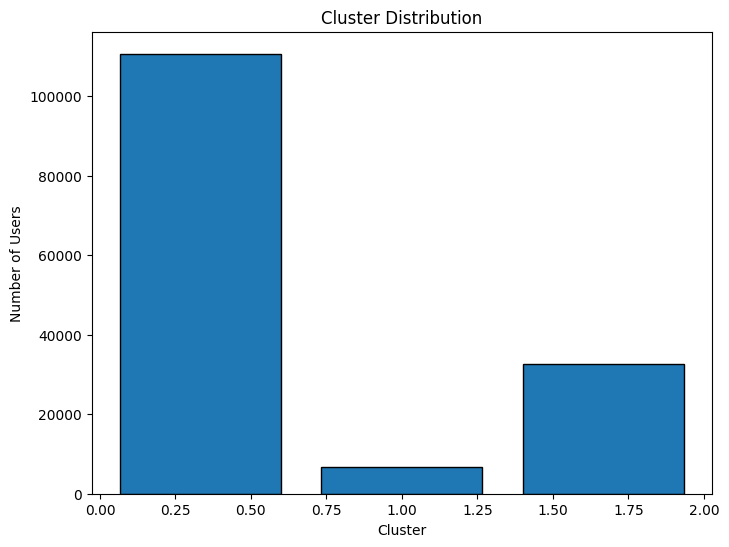

In [17]:
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Experience_Cluster'], bins=3, edgecolor='black', align='mid', rwidth=0.8)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()